In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [18]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [19]:
df.Name.nunique()

887

In [20]:
df = df.set_index('Name')

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [22]:
df.columns = ['Survived','Pclass','Sex','Age','Siblings','Parents','Fare']

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [24]:
df.Survived.mean() #38%생존

0.3855693348365276

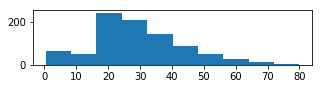

In [41]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

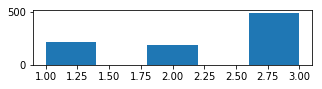

In [49]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [47]:
s = df['Sex']

In [50]:
s.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [51]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

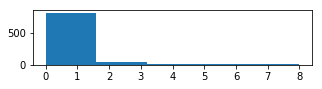

In [66]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values, bins=5)

(array([39., 20., 80., 78., 60., 34., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

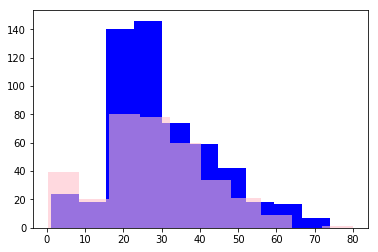

In [67]:
plt.hist(df[df['Survived']==0]['Age'].values,color='blue')
plt.hist(df[df['Survived']==1]['Age'].values,color='pink',alpha=0.6)

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

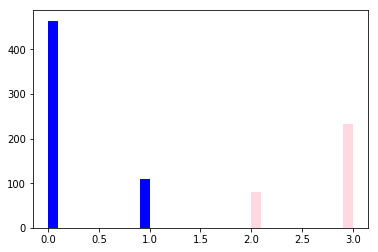

In [68]:
plt.hist(df[df['Sex']=='male']['Survived'].values,color='blue')
plt.hist(df[df['Sex']=='female']['Survived'].values+2,color='pink',alpha=0.6)

In [73]:
#1,2,3 등석은 범주형입니다.
df['Pclass'] = df['Pclass'].astype('object')

In [74]:
df.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [76]:
data = pd.get_dummies(df)

In [77]:
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [101]:
X = data.drop(columns='Survived')
y = data['Survived']

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)
model.score(X,y)

0.8489289740698985

In [103]:
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


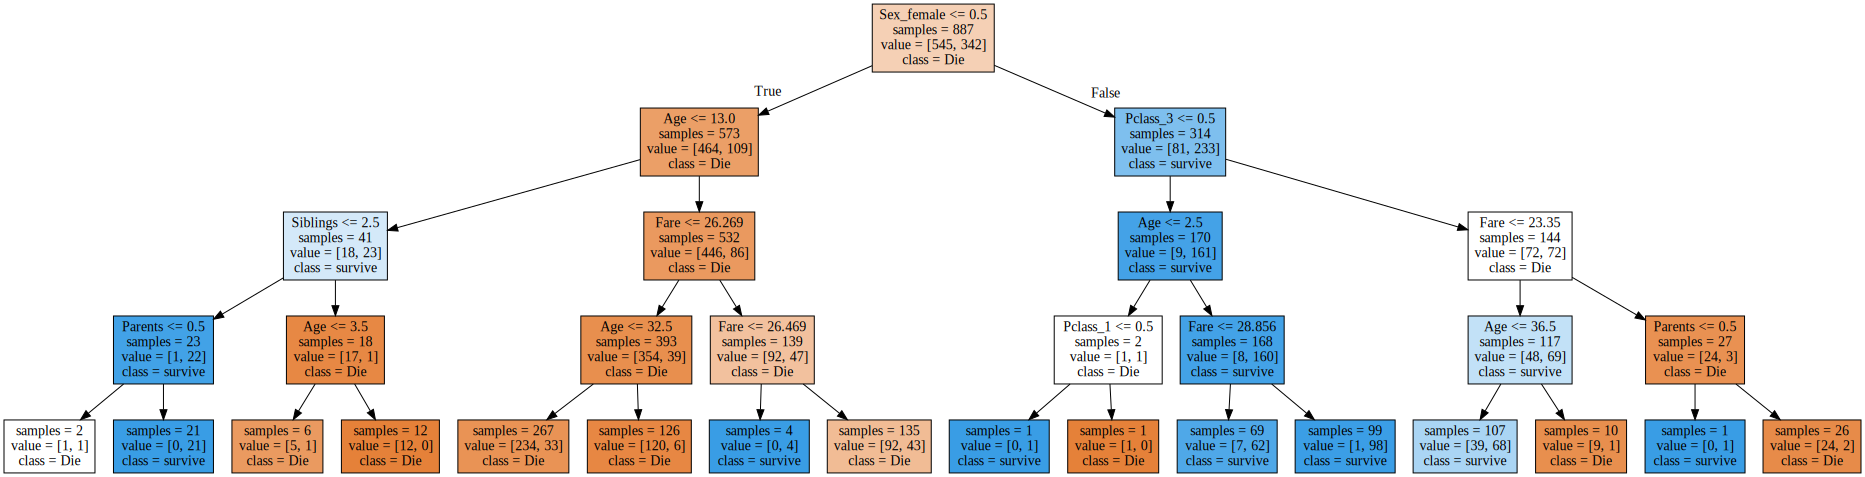

In [104]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','survive'],
                feature_names=X.columns, impurity=False, filled=True)
with open ('titanic.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

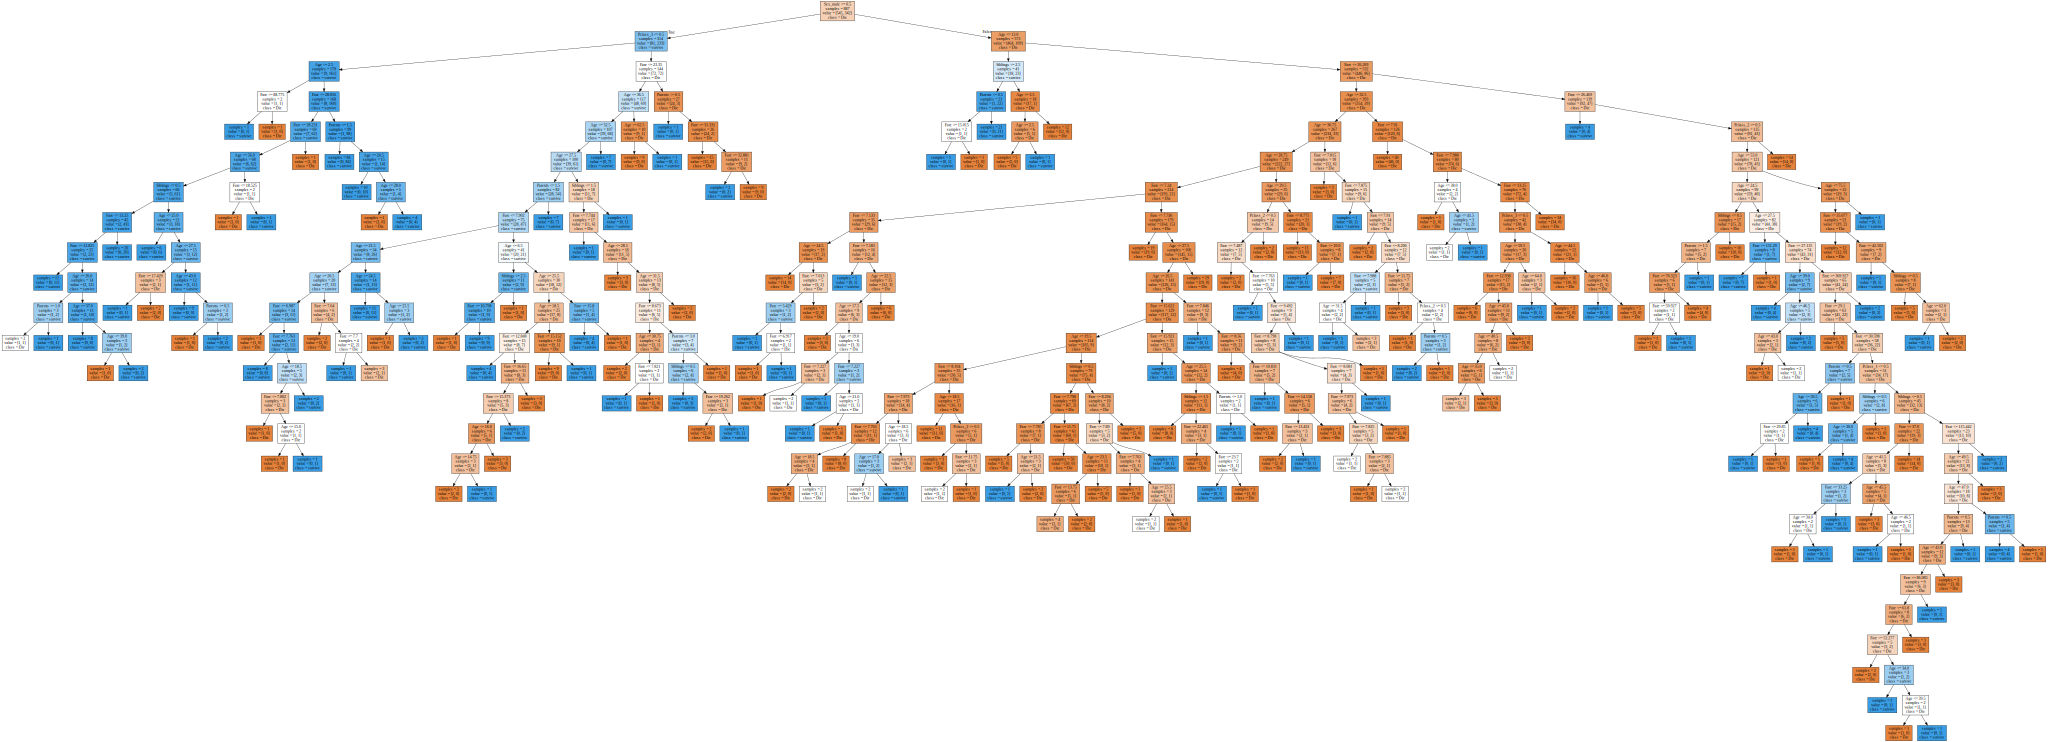

In [107]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [108]:
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [109]:
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [112]:
loans = loans.dropna()
loans.isna().sum().sum()

0

In [113]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [116]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [117]:
k = loans.purpose

In [119]:
k.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

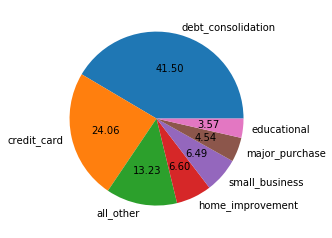

In [121]:
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(),autopct='%.2f')

In [122]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

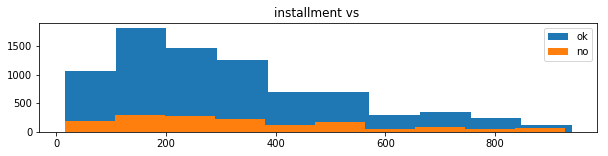

In [128]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs ')
p = plt.legend()
              

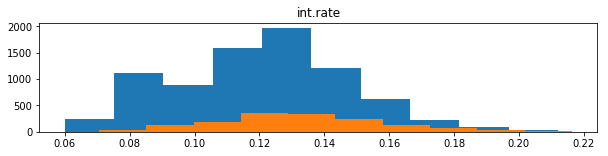

In [129]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate')

In [140]:
loans.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [142]:
loans['credit.policy'].dtypes

dtype('int64')

In [132]:
loans = pd.get_dummies(loans) #카테고리를 위한 인코딩

In [135]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [136]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

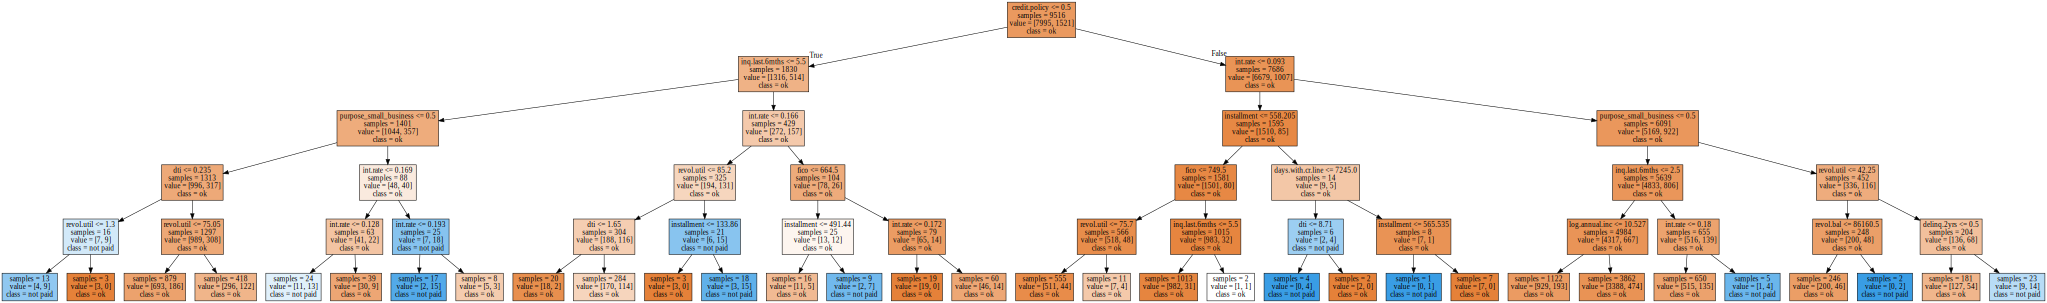

In [138]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not paid'],
                feature_names=X.columns, impurity=False, filled=True)
with open ('loan.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [131]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0
